# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

<AxesSubplot:xlabel='left_company'>

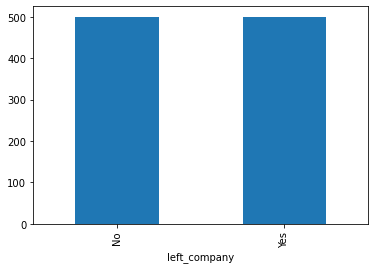

In [2]:
# insert code
new_df= df.groupby(by='left_company').size()
new_df.plot.bar()

Insert comments here

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [3]:
# numerical_vars = []
# categorical_Vars = []

df.dtypes

left_company                     object
age                               int64
frequency_of_travel              object
department                       object
commuting_distance                int64
education                         int64
satisfaction_with_environment     int64
gender                           object
seniority_level                   int64
position                         object
satisfaction_with_job             int64
married_or_single                object
last_raise_pct                    int64
last_performance_rating           int64
total_years_working               int64
years_at_company                  int64
years_in_current_job              int64
years_since_last_promotion        int64
years_with_current_supervisor     int64
dtype: object

In [4]:
# numerical_vars = []
df_numerical_vars = df.select_dtypes(include='number')

# categorical_vars = []
df_categorical_vars = df.select_dtypes(include='object')

In [5]:
df_numerical_vars.head()

,age,commuting_distance,education,satisfaction_with_environment,seniority_level,satisfaction_with_job,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,37,16,4,4,2,3,19,3,9,1,0,0,0
1,39,3,2,3,2,3,15,3,11,10,8,0,7
2,52,25,4,3,4,4,22,4,31,9,8,0,0
3,50,1,3,4,2,3,12,3,19,18,7,0,13
4,44,4,3,4,2,2,12,3,10,5,2,2,3


In [6]:
df_categorical_vars.head()

,left_company,frequency_of_travel,department,gender,position,married_or_single
0,No,Travel_Rarely,Sales,Male,Sales Executive,Divorced
1,No,Travel_Rarely,Research & Development,Male,Laboratory Technician,Divorced
2,No,Travel_Frequently,Research & Development,Female,Manufacturing Director,Married
3,No,Non-Travel,Sales,Female,Sales Executive,Married
4,No,Travel_Rarely,Research & Development,Male,Healthcare Representative,Single


Insert comments here

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [7]:
# insert code here
df_numerical_vars = df_numerical_vars[~df_numerical_vars.isin([np.nan, np.inf, -np.inf]).any(1)]
X_variables = df_numerical_vars

In [8]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df["feature"] = X_variables.columns
vif_df["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [9]:
vif_df.head()

,feature,VIF
0,age,27.168360
1,commuting_distance,2.433846
2,education,8.740078
3,satisfaction_with_environment,6.173071
4,seniority_level,10.701452


Insert comments here

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [10]:
# insert code here
from sklearn.model_selection import train_test_split
X = df.drop('left_company', axis=1)
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=124)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 800
Test samples: 200


In [11]:
X_train

,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
294,35,Travel_Rarely,Research & Development,7,3,3,Male,3,Manufacturing Director,3,Single,21,4,17,8,5,1,6
766,33,Travel_Rarely,Research & Development,14,3,3,Male,1,Laboratory Technician,4,Married,13,3,8,5,4,0,4
28,47,Non-Travel,Research & Development,14,4,3,Male,2,Research Scientist,2,Married,18,3,16,8,7,1,7
85,30,Travel_Rarely,Sales,15,2,3,Male,3,Sales Executive,1,Divorced,11,3,12,7,7,1,7
176,27,Travel_Rarely,Research & Development,16,4,3,Female,1,Laboratory Technician,2,Married,14,3,4,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,24,Travel_Rarely,Sales,3,2,1,Female,2,Sales Executive,3,Single,14,3,4,2,2,2,0
135,38,Travel_Rarely,Research & Development,2,5,4,Male,1,Research Scientist,3,Married,13,3,6,1,0,0,1
17,40,Travel_Rarely,Research & Development,10,4,4,Female,1,Laboratory Technician,3,Married,13,3,10,7,7,1,7
668,34,Non-Travel,Research & Development,16,4,4,Male,1,Research Scientist,1,Married,23,4,5,5,2,3,0


In [12]:
y_train

294     No
766    Yes
28      No
85      No
176     No
      ... 
962    Yes
135     No
17      No
668    Yes
462     No
Name: left_company, Length: 800, dtype: object

# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [13]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression


polys = []
non_polys = df_numerical_vars.columns
ohes = df_categorical_vars.columns.drop('left_company')

poly_pipeline = Pipeline([
    ('add_polynomials', PolynomialFeatures(2, include_bias=False)),
    ('standardize_poly', StandardScaler())]
)
    
processing_pipeline = ColumnTransformer(transformers=[
    ('poly_processing', poly_pipeline, polys),
    ('nonpoly_scaling', StandardScaler(), non_polys),
    ('dummys', OneHotEncoder(drop='first'), ohes)]
)

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [14]:
# insert code here
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('logreg', LogisticRegression(penalty=None, max_iter=500))
                              ])

In [15]:
modeling_pipeline.fit(X_train,y_train)
print("Training dataset score is" ,modeling_pipeline.score(X_train, y_train))
print("Testing dataset score is" ,modeling_pipeline.score(X_test, y_test))

Training dataset score is 0.7275
Testing dataset score is 0.67


Insert comments here

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Insert comments here

1.As the difference between Training dataset score and Testing dataset is not so great, that is 0.7275-0.67=0.05. 
The model is neither overfitting or underfitting. Its actually good model.
2.In order to decrease even that difference to 0, we can increase the training data, so the accurancies 
of training daatsets and testing datasets will be equal.
3.There is an alternate way to increase accuracy is to add polynomial features to dataset.